# Airline Customer Holiday Booking Dataset
## Unveiling Customer Preferences and Booking Patterns in the Airline Holiday Industries
This dataset provides comprehensive information about customers' preferences and behaviors related to airline holiday bookings. With detailed attributes covering various aspects of the booking process, this dataset is ideal for analyzing and understanding customer choices and patterns in the airline industry.
https://www.kaggle.com/datasets/manishkumar7432698/airline-passangers-booking-data
Source: British Airways

In [5]:
# Import the Standard Librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.io as pio
import matplotlib.image as mpimg
import plotly.graph_objects as go
warnings.filterwarnings('ignore')


In [6]:
# Load the data
data = pd.read_csv('C:/Airline_Booking_Project/Dataset/Passanger_booking_data.csv')
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


# Data Preprocessing
 - In the data preprocessing phase I first examined the shape of the data to understand its dimensions.
 - Next I checked for null values in the dataset and removed them if any were found.
 - Additionally, I performed a check for duplicate  values and replaced them to ensure data integrity.
 - To gain insights into the relationships between different variable, I visualized the correlation map using a heatma. Thie visualization  allowed us to identify paterns and dependencies among the features in the dataset, helping us to understand the interplay between various attribute.



In [7]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [8]:
# Checking the data shape
print(f'The dataset contains {data.shape[0]} rows and {data.shape[1]} columns')
data.shape

The dataset contains 50002 rows and 14 columns


(50002, 14)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50002 non-null  int64  
 1   sales_channel          50002 non-null  object 
 2   trip_type              50002 non-null  object 
 3   purchase_lead          50002 non-null  int64  
 4   length_of_stay         50002 non-null  int64  
 5   flight_hour            50002 non-null  int64  
 6   flight_day             50002 non-null  object 
 7   route                  50002 non-null  object 
 8   booking_origin         50002 non-null  object 
 9   wants_extra_baggage    50002 non-null  int64  
 10  wants_preferred_seat   50002 non-null  int64  
 11  wants_in_flight_meals  50002 non-null  int64  
 12  flight_duration        50002 non-null  float64
 13  booking_complete       50002 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [10]:
# Statistic about the data set
data.describe().style.background_gradient(cmap='viridis')


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000
mean,1.591256,84.940582,23.044778,9.066277,0.668773,0.296968,0.427143,7.277524,0.149574
std,1.020167,90.450548,33.887171,5.412569,0.470659,0.456927,0.494668,1.496854,0.356657
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [11]:
# Checking the null values in the dataset 
data.isna().sum()/len(data)*100

num_passengers           0.0
sales_channel            0.0
trip_type                0.0
purchase_lead            0.0
length_of_stay           0.0
flight_hour              0.0
flight_day               0.0
route                    0.0
booking_origin           0.0
wants_extra_baggage      0.0
wants_preferred_seat     0.0
wants_in_flight_meals    0.0
flight_duration          0.0
booking_complete         0.0
dtype: float64

In [12]:
# Checking the duplicate values in the data
duplicate_values= data.duplicated().sum()
print(f'The data contains {duplicate_values} duplicate values')

The data contains 719 duplicate values


In [13]:
# drop the duplicate values in the dataset 
data = data.drop_duplicates()
data.shape

(49283, 14)

<function matplotlib.pyplot.show(close=None, block=None)>

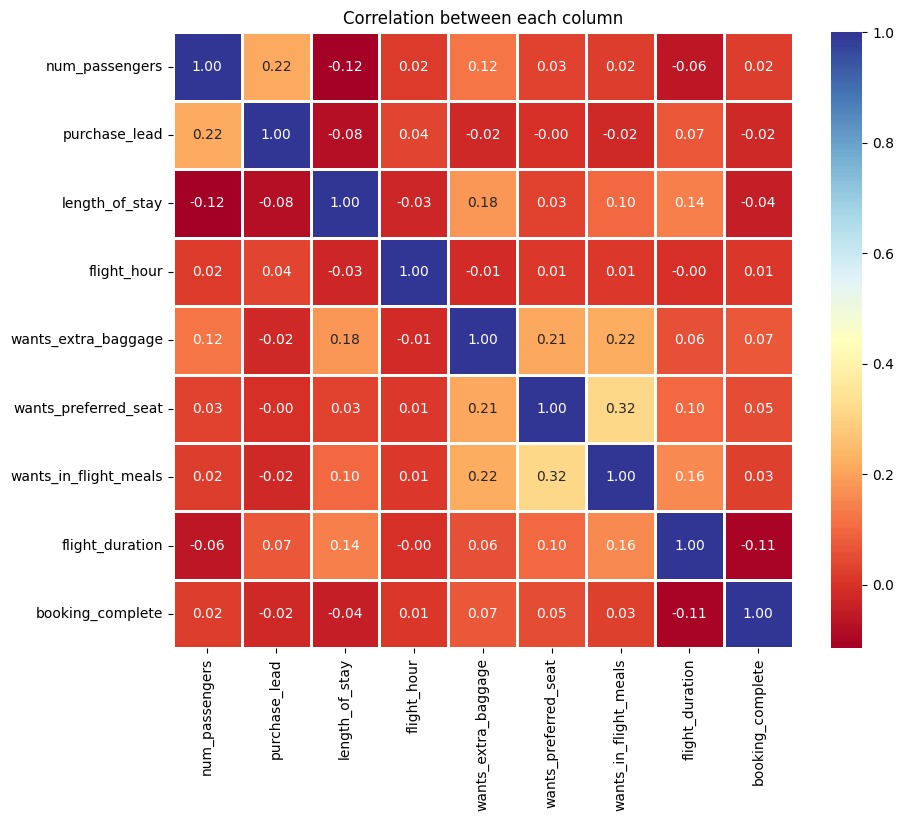

In [14]:
# Visualize the correlation map
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='RdYlBu', fmt='.2f',
            linewidths=1,)
plt.title("Correlation between each column")
plt.show

# Exploratory Data Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

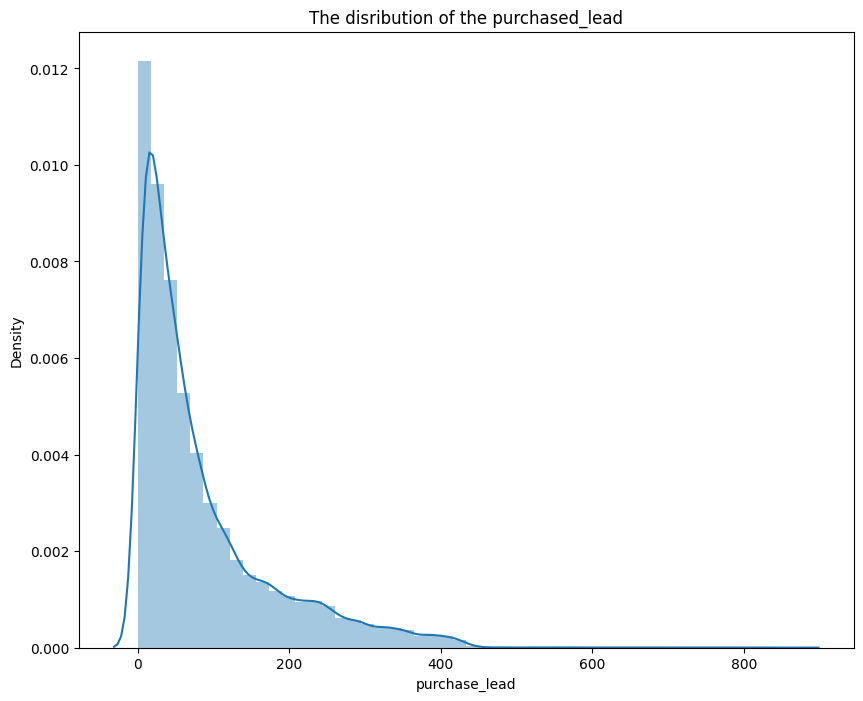

In [15]:
# Distribution of the num of passengers in the data
plt.figure(figsize=(10,8))
sns.distplot(data['purchase_lead'],hist=True, bins=50)
plt.title("The disribution of the purchased_lead")
plt.show

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Malaysia'),
  Text(2, 0, 'South Korea'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'China'),
  Text(5, 0, 'Indonesia'),
  Text(6, 0, 'Taiwan'),
  Text(7, 0, 'Thailand'),
  Text(8, 0, 'India'),
  Text(9, 0, 'New Zealand')])

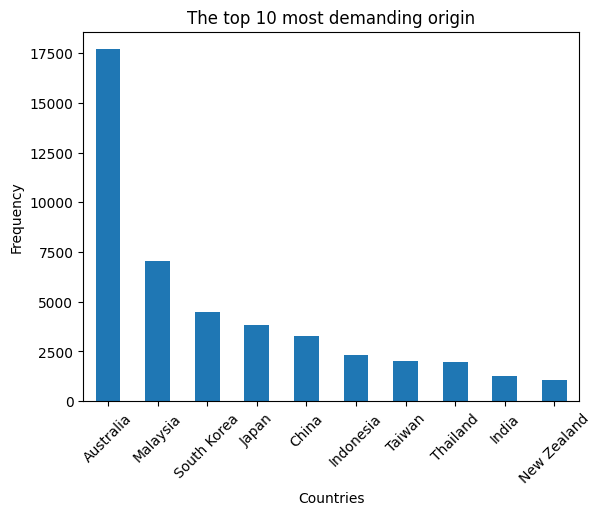

In [16]:
# Create a bar plot to visualize the top 10 most demanding origin
top_booking_origins = data['booking_origin'].value_counts().head(10)
top_booking_origins.plot(kind='bar')
#sns.barplot(x=top_booking_origins.index, y=top_booking_origins.values, palette='Set2')
plt.title("The top 10 most demanding origin")
plt.xlabel("Countries")
plt.ylabel("Frequency")
plt.xticks(rotation= 45)

<function matplotlib.pyplot.show(close=None, block=None)>

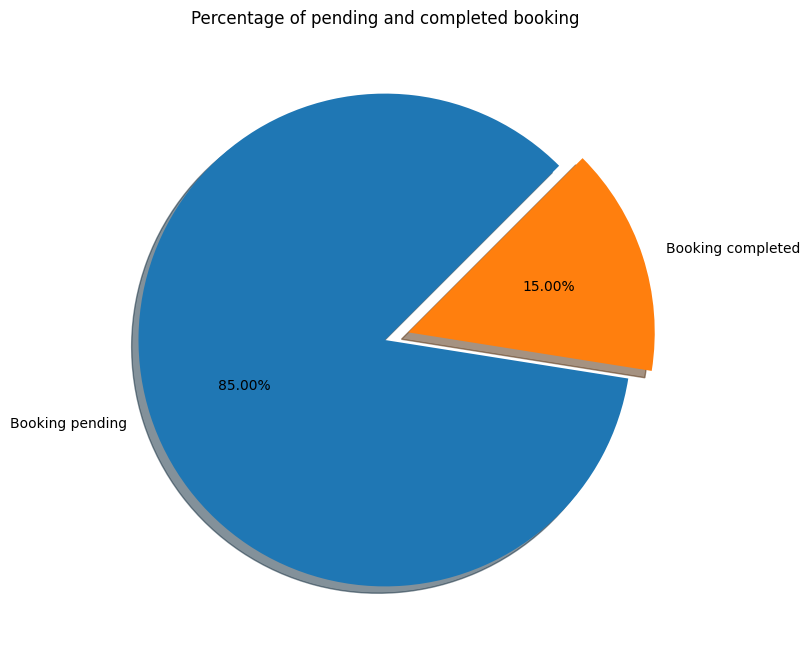

In [17]:
booking_counts = data['booking_complete'].value_counts()
plt.figure(figsize=(8,8))
explode = (0, 0.1)
#labels=booking_counts.index,
plt.pie(booking_counts,  autopct='%1.2f%%', startangle=45, labels= ['Booking pending', 'Booking completed'],  explode=explode, shadow=True )
plt.title("Percentage of pending and completed booking")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

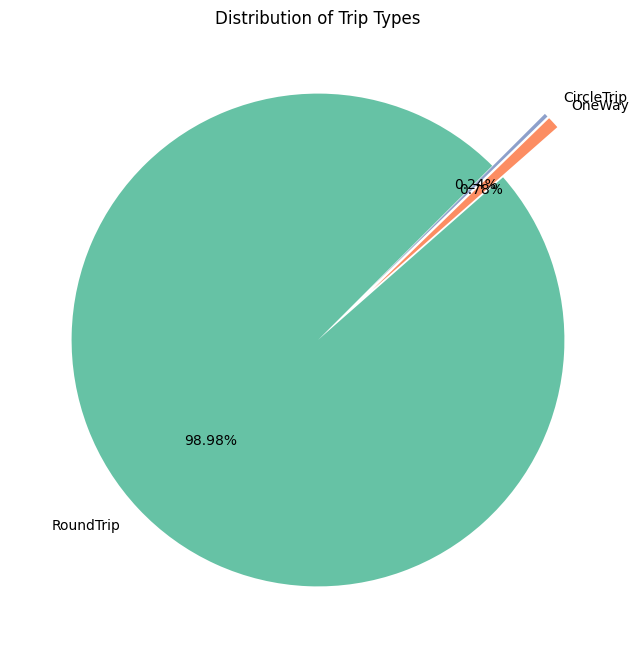

In [18]:
# The distribution of the trip type

trip_type_counts = data['trip_type'].value_counts()
plt.figure(figsize=(8,8))
explode = (0, 0.3, 0.3)
plt.pie(trip_type_counts, labels=trip_type_counts.index, autopct='%1.2f%%', startangle=45, colors=plt.cm.Set2.colors, explode=explode)
plt.title("Distribution of Trip Types")
#plt.axes("equal")
plt.show

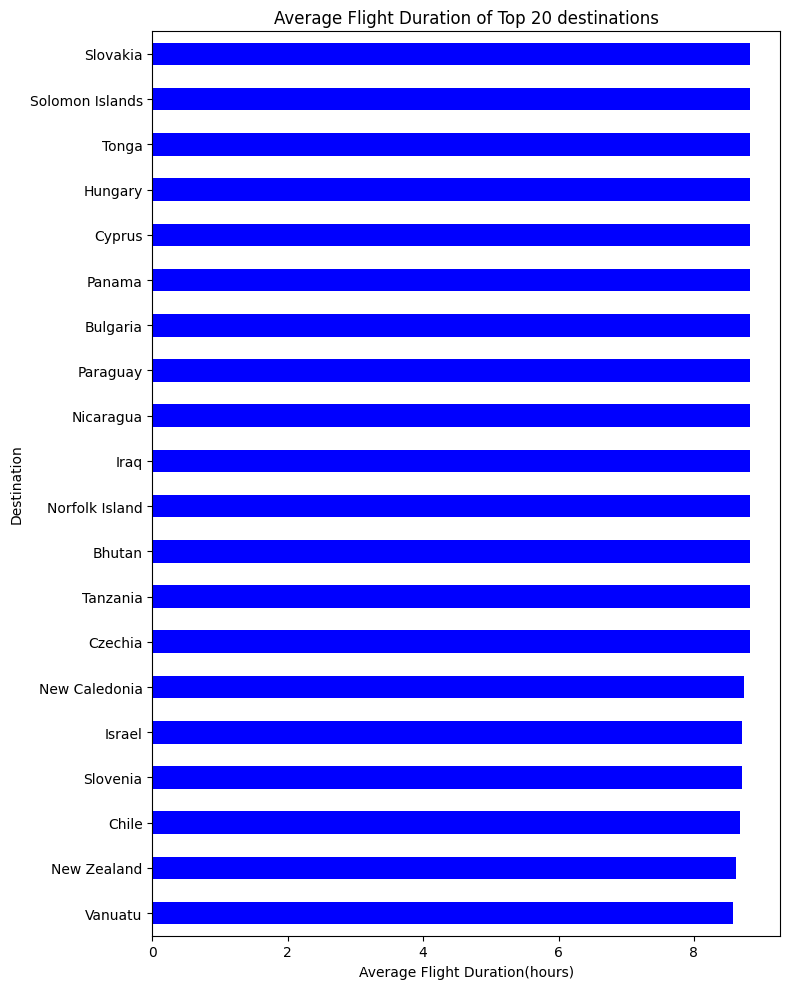

In [27]:
# Find the average flight duration of the top 20 destinations in bar chart
data.groupby('booking_origin')['flight_duration'].mean().sort_values(ascending=False)

# Get the top 20 destinations based on flight duration
#top_20_destinations = destination_flight_duration.nlargest(20)  
top_20_destinations =  data.groupby('booking_origin')['flight_duration'].mean().sort_values().nlargest(20)

plt.figure(figsize=(8,10))
top_20_destinations.sort_values().plot(kind='barh', color='blue')
# Set the title and labels
plt.title("Average Flight Duration of Top 20 destinations")
plt.xlabel("Average Flight Duration(hours)")
plt.ylabel("Destination")

# Display the the plot
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

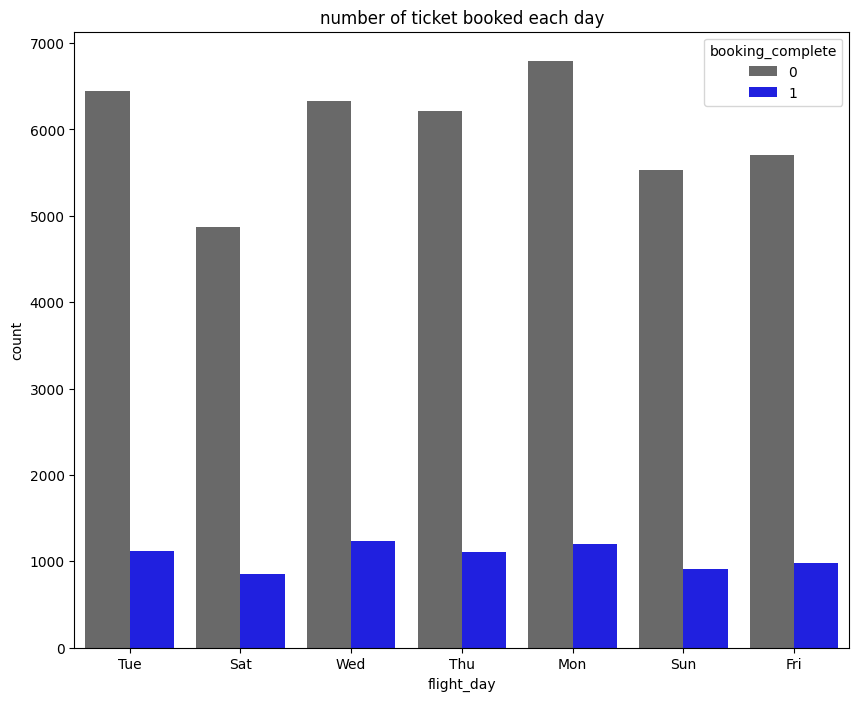

In [28]:
# Create  countplot to understand the booking stautus on the flight day
plt.figure(figsize=(10,8))
sns.countplot(data=data, x='flight_day',hue='booking_complete', palette=['dimgrey', 'blue'])
plt.title("number of ticket booked each day")
plt.show

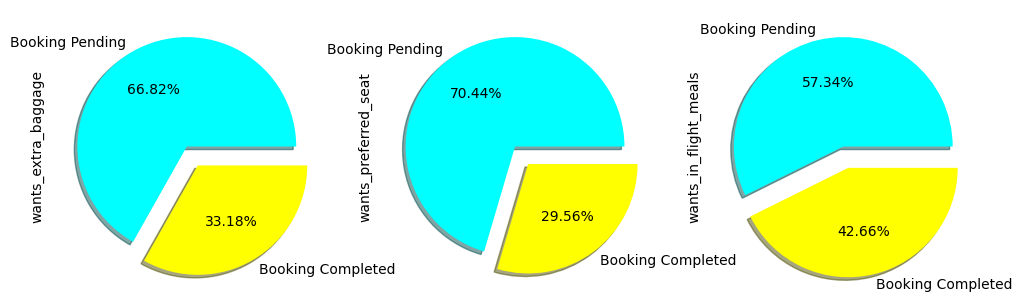

In [29]:
# Create a dataframe for the extra
df=['wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals']
plt.figure(figsize=(12,5))
for i, col in enumerate(df):
    plt.subplot(1, 3, i+1)
    data[col].value_counts().plot(kind='pie', explode=[0, 0.2],
    labels = ['Booking Pending', 'Booking Completed'],
    colors = ['#00FFFF', '#FFFF00'],
    autopct= '%1.2f%%',
    shadow=True
    )

<function matplotlib.pyplot.show(close=None, block=None)>

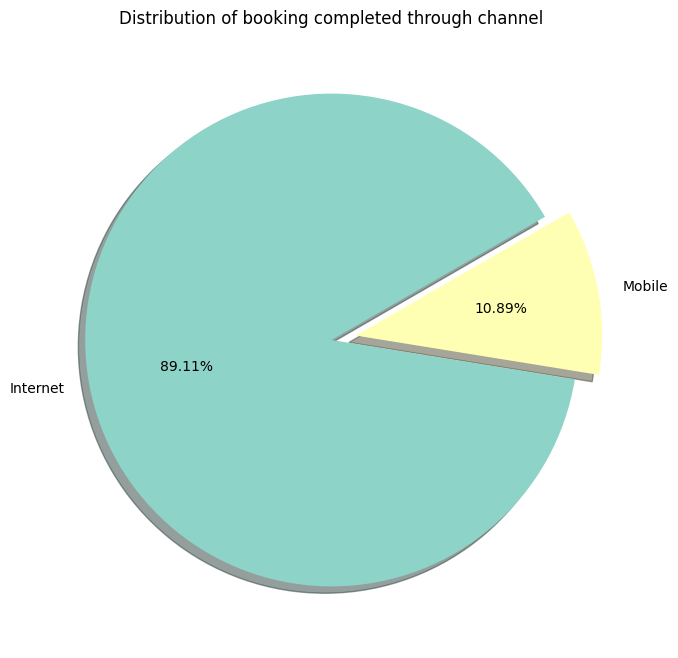

In [30]:
# Let's compare how much percentage of the booking complete through internet and mobile
channel_counts = data['sales_channel'].value_counts()
plt.figure(figsize=(8,8))
explode = (0, 0.1)
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.2f%%', startangle=30, colors=plt.cm.Set3.colors, explode=explode, shadow=True)
plt.title("Distribution of booking completed through channel")
plt.show

In [31]:
# Create a separate dataframe for roundtrip and find which day most of the ticket is booked
df_roundtrip = data[data["trip_type"]== "RoundTrip"]
df_roundtrip.groupby('flight_day')['booking_complete'].value_counts().unstack()

booking_complete,0,1
flight_day,,
Fri,5647,971
Mon,6724,1191
Sat,4809,853
Sun,5465,911
Thu,6151,1104
Tue,6350,1115
Wed,6267,1222


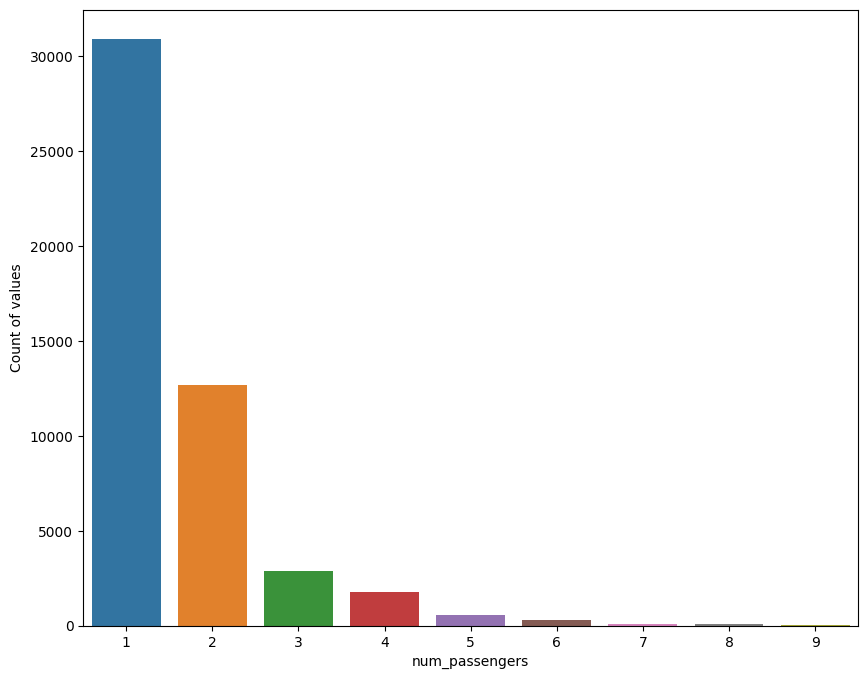

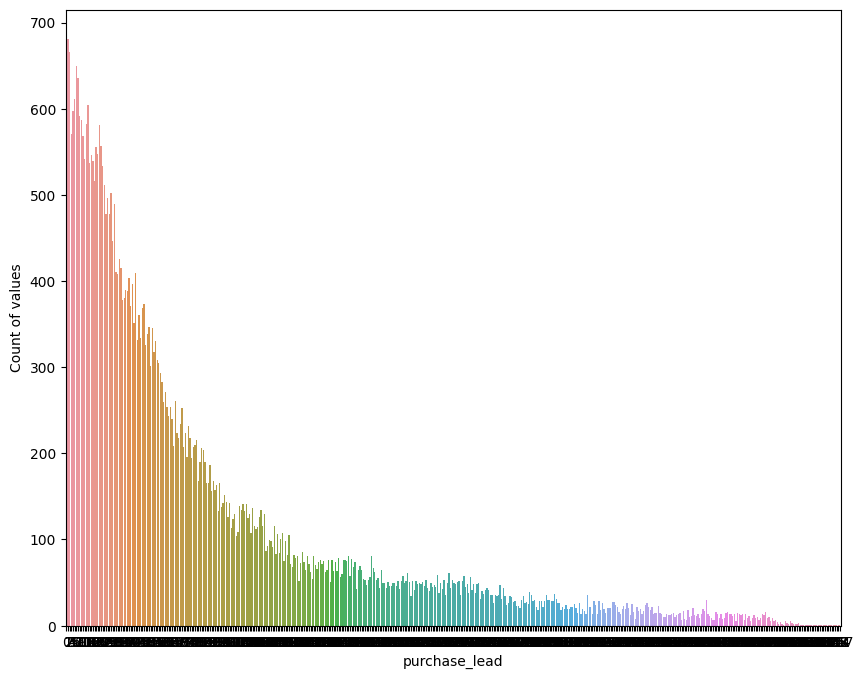

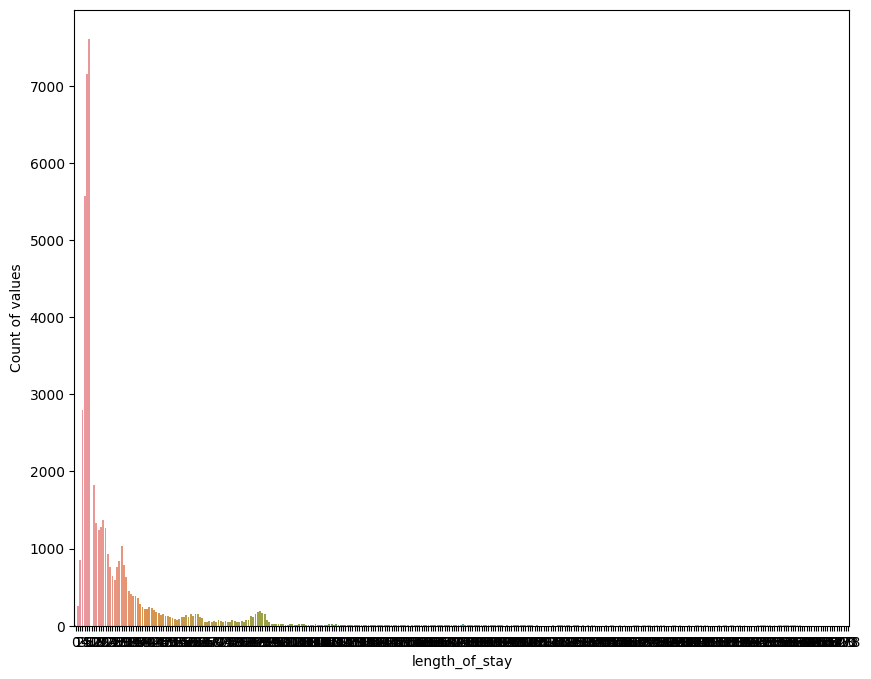

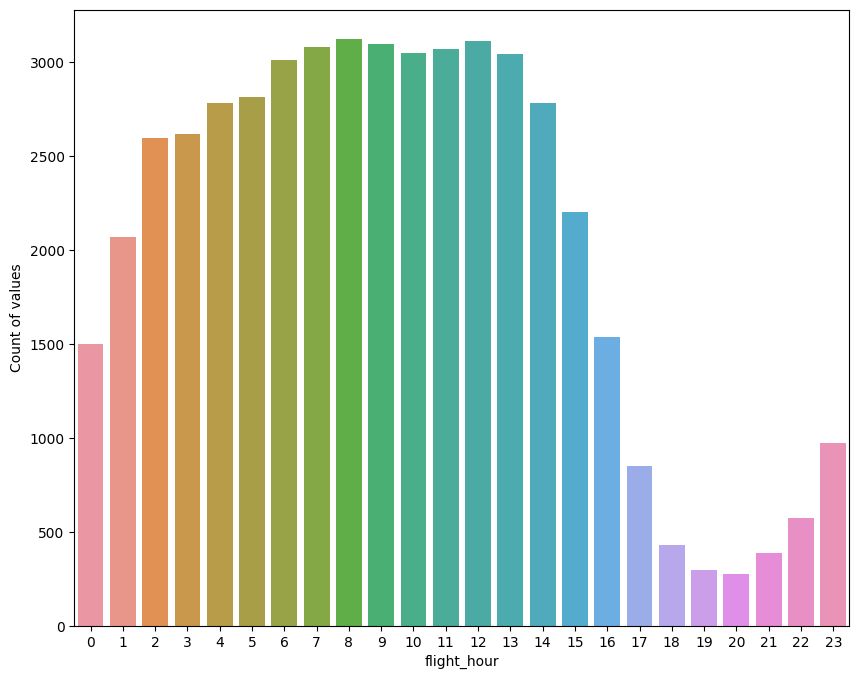

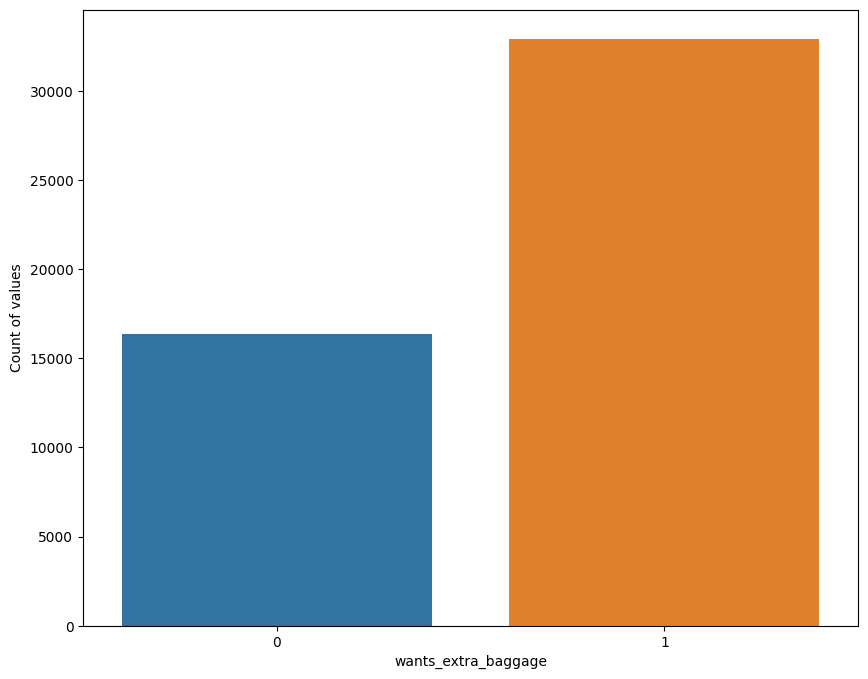

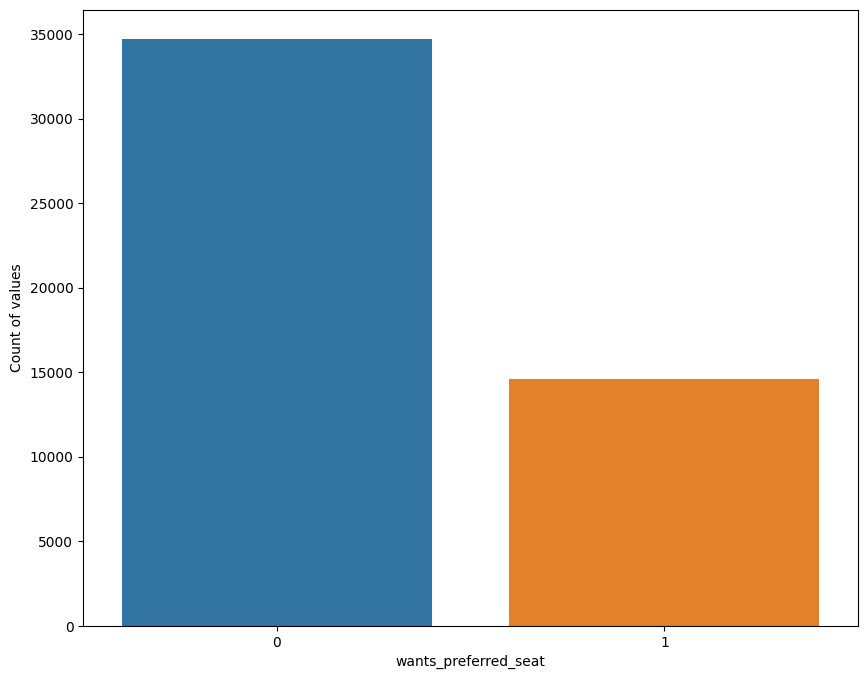

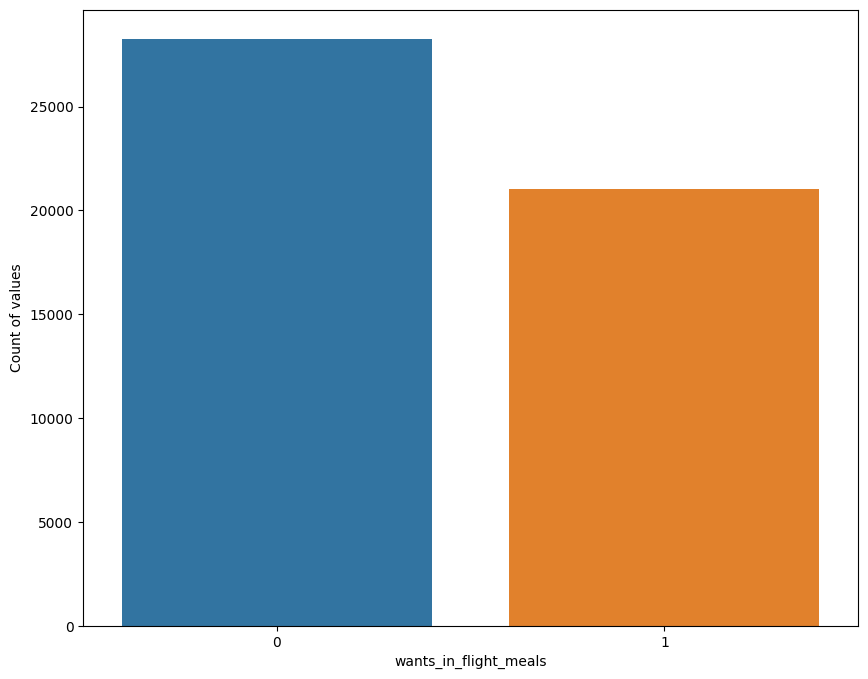

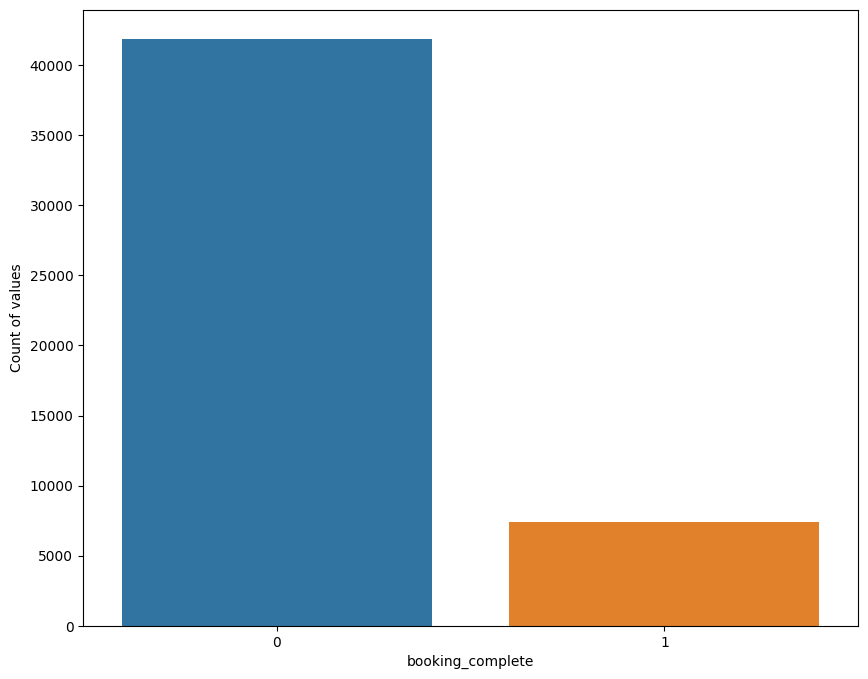

In [32]:
# Create a countplot to understand the each column values in the data
for i in data.select_dtypes(include="int"):
    plt.figure(figsize=(10,8))
    sns.countplot(data=data, x=data[i])
    plt.xlabel (f'{i}')
    plt.ylabel("Count of values")
    plt.show()

In [34]:
# Using the groupby function I can find how many bookings are done each day through each channel
data.groupby('sales_channel')['flight_day'].value_counts().unstack()

flight_day,Fri,Mon,Sat,Sun,Thu,Tue,Wed
sales_channel,,,,,,,
Internet,5897,7197,4965,5591,6606,6827,6835
Mobile,788,791,758,851,717,732,728


In [35]:
# Using the pivot table to find each origin and day which most ticket is booked
partial_pivot_table=pd.pivot_table(data, index= "booking_origin", columns= "flight_day", values="booking_complete", aggfunc='mean')
partial_pivot_table.to_csv("pivot_table.csv")




# Observations:
-   During the Exploratory Data Analysis (EDA) phase, we identified  several interesting insights.
-   The distribution plot revealed that the majority of purchase leads fall withiin the range of 200 to 400.
-   Australia recorded the highest number of purchase leads, followed by Malaysia in second place.
-   Only 15% of the leads resulted in the tickect bookings, indicating that 85% did not convert.
-   Countries like Jordan and New Zealand had a hihger average flight duration compared to others.
-   The pie chart showed that 92% of booking were completed  through the internet , hile 8% were completed  via mobile devices.

# Machine Learning Modeling
-   Firstly, we utilized the label encoder to convert categorical columns into numerical values, enabling us to work with these features in our machine learning models.

-   Next, we divided the data into independent and dependent  variables. To ensure uniformity in the data, we applied normalization techniques.
-   Subsequently, we split the data into training  and testing sets, reserving 20%  of the data for testing purposes, thus allowing us to evaluate the model's performance  on unseen data.
-   We proceed to create a function for machine learning modeling. With this function, we could apply various classification algorithms to the data and compare their performance to determine the most suitable model for our task.

In [36]:
# Import the all required libraries for machine learning modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49283 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49283 non-null  int64  
 1   sales_channel          49283 non-null  object 
 2   trip_type              49283 non-null  object 
 3   purchase_lead          49283 non-null  int64  
 4   length_of_stay         49283 non-null  int64  
 5   flight_hour            49283 non-null  int64  
 6   flight_day             49283 non-null  object 
 7   route                  49283 non-null  object 
 8   booking_origin         49283 non-null  object 
 9   wants_extra_baggage    49283 non-null  int64  
 10  wants_preferred_seat   49283 non-null  int64  
 11  wants_in_flight_meals  49283 non-null  int64  
 12  flight_duration        49283 non-null  float64
 13  booking_complete       49283 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ 

In [38]:
# Convert the categorical data into the numerical using the labelencoder
for col in data.select_dtypes(include='object').columns:
    label_encoder=LabelEncoder()
    label_encoder.fit(data[col].unique())
    data[col]=label_encoder.transform(data[col])

In [39]:
# Divide the data into independent and dependent variables
X=data.drop(['booking_complete', 'purchase_lead','route'], axis=1)
y=data['booking_complete']

# Scaling the data 
scaler= StandardScaler()
X= scaler.fit_transform(X)

# Split the data intro train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 120)

In [40]:
# Create a function for machine learning model
def model_building(model, X_train, X_test, y_train, y_test):
    print(f'Name: {model}')
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    print(f'\n{name} - Accuracy Score: {score*100:.2f}%')
    print(f'\n{name} - Classification Report:\n{classification_report(y_test, y_pred)}')
    print(f'\nConfusion_matrix:\n{confusion_matrix(y_test,y_pred)}')
    print('*'*30)



In [41]:
# Create all model into the dictionary format
models={
    'logistic':LogisticRegression(),
    'decisiontree':DecisionTreeClassifier(),
    'random':RandomForestClassifier(),
    'Kneighbors':KNeighborsClassifier(),
    'xGB':XGBClassifier(),
    'Cat':CatBoostClassifier(iterations=1)

}

In [42]:
# Then iterating through the each model and visualize the classification and confusion
for i in range(len(models)):
    model=list(models.values())[i]
    name=list(models.keys())[i]
    model_building(model, X_train,X_test, y_train, y_test)

Name: LogisticRegression()

logistic - Accuracy Score: 84.95%

logistic - Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8374
           1       0.00      0.00      0.00      1483

    accuracy                           0.85      9857
   macro avg       0.42      0.50      0.46      9857
weighted avg       0.72      0.85      0.78      9857


Confusion_matrix:
[[8374    0]
 [1483    0]]
******************************
Name: DecisionTreeClassifier()

decisiontree - Accuracy Score: 76.67%

decisiontree - Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      8374
           1       0.26      0.29      0.28      1483

    accuracy                           0.77      9857
   macro avg       0.57      0.57      0.57      9857
weighted avg       0.78      0.77      0.77      9857


Confusion_matrix:
[[7120 1254]
 [1046  437]]
*****************

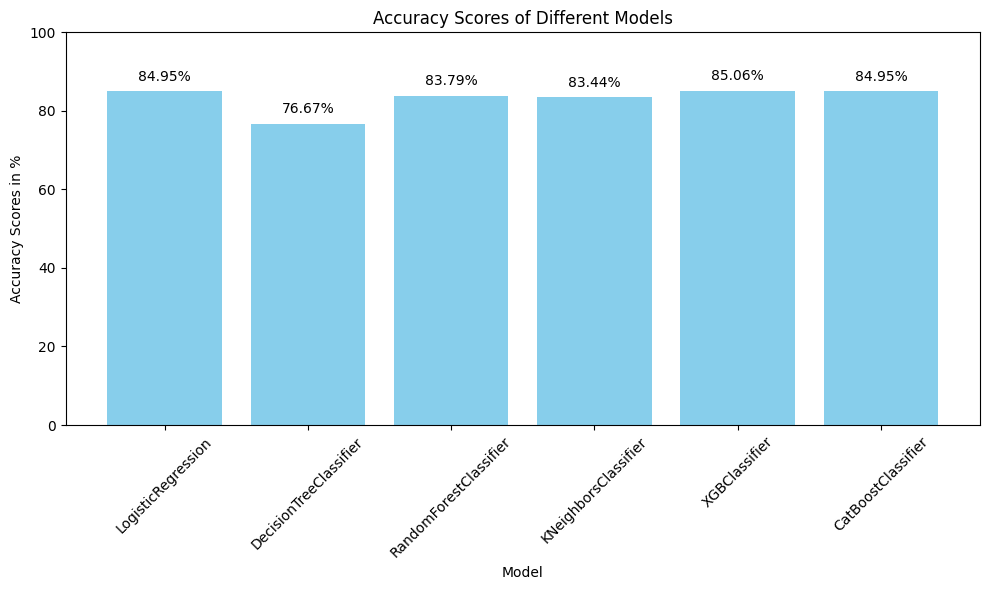

In [45]:
# Initialize lists to store model names and accuracy scores
name_of_model = [
    'LogisticRegression', 
    'DecisionTreeClassifier', 
    'RandomForestClassifier', 
    'KNeighborsClassifier', 
    'XGBClassifier', 
    'CatBoostClassifier'
]

accuracies = [84.95, 76.67, 83.79, 83.44, 85.06, 84.95]

# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(name_of_model, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy Scores in %')
plt.title('Accuracy Scores of Different Models')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.ylim([0, 100])  # Set the y-axis range between 0 and 100 for accuracy scores

# Add the accuracy values on top of each bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f'{accuracy:.2f}%', ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


# Conclusion
-   XGBClassifier is the best model for prediction with  accuracy_score of 85.06%